## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results,
                                 how='left', on='Mouse ID')

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = combined_mouse_df["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#This didnt work so tried a different way to drop the bad mouse below
new_mice_data = combined_mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
new_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

new_mice_data.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1636
Metastatic Sites         5
dtype: int64

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mice_data_1 = combined_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
new_mice_data_1

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_data_1.value_counts()

False    1883
True       10
dtype: int64

In [7]:
#duplicated mice data
combined_mouse_df.loc[new_mice_data_1, :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
#new correct Data Frame
mice_data_use=combined_mouse_df.loc[combined_mouse_df["Mouse ID"] !="g989"]
mice_data_use

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
#number of correct mice
mice_data_use.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = mice_data_use.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mice_data_use.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mice_data_use.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sd = mice_data_use.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mice_data_use.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_stat_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": sd, 
                          "SEM": sem})
summary_stat_df




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_group_by = mice_data_use.groupby('Drug Regimen')
summary_stats_agg = aggregation_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [13]:
# number of mice tested on each drug
mice_tested = mice_data_use.groupby('Drug Regimen')['Mouse ID'].count()
mice_tested

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<AxesSubplot:>

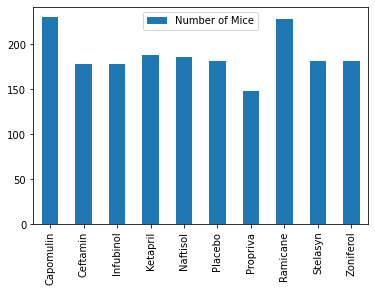

In [14]:
#bar plot generation
number_mice = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
index = ['Capomulin', 'Ceftamin', 'Infubinol',
         'Ketapril', 'Naftisol', 'Placebo', 'Propriva',
        'Ramicane', 'Stelasyn', 'Zoniferol']
bar_mice_pandas = pd.DataFrame({'Number of Mice': number_mice},
                    index=index)
bar_mice_pandas.plot(kind="bar")

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
Drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo",
        "Propriva","Ramicane", "Stelasyn", "Zoniferol"]
number_mice = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(number_mice))
x_axis = Drugs


<BarContainer object of 10 artists>

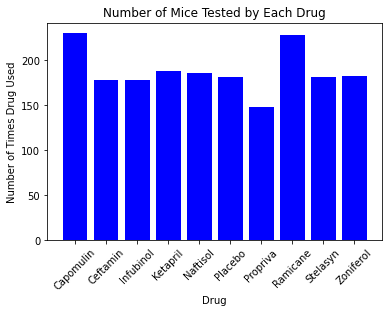

In [16]:
#bar plot generation
plt.xticks(rotation = 45)
plt.title("Number of Mice Tested by Each Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Times Drug Used")
plt.bar(x_axis, number_mice, color="b", align="center")

In [18]:
#counting gender of mice
gender_count = mice_data_use.groupby(['Sex']).nunique()["Mouse ID"]
gender_count

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

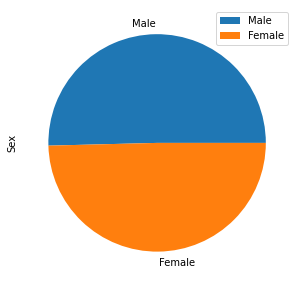

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_pandas_df = pd.DataFrame({'Sex': [125, 123]},
                  index=['Male', 'Female'])
plot = pie_pandas_df.plot.pie(y='Sex', figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x7fb2352a43a0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Male'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Female')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

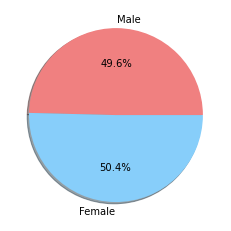

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [123, 125]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_timepoint_df = mice_data_use.groupby(['Mouse ID'])['Timepoint'].max()
sorted_timepoint_df = sorted_timepoint_df.reset_index()



In [22]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_timepoint_df = sorted_timepoint_df.merge(mice_data_use, how='left',
                                on=['Mouse ID', 'Timepoint'])
combined_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [23]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 

    #df.loc[df['shield'] > 6, ['max_speed']]
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_list:
    final_tumor_volume=combined_timepoint_df.loc[combined_timepoint_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(final_tumor_volume)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_lower = final_tumor_volume < lower_bound
    outlier_higher = final_tumor_volume > upper_bound
    outliers = final_tumor_volume.loc[outlier_lower | outlier_higher]
    print(outliers)

    

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


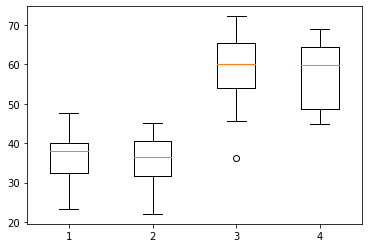

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

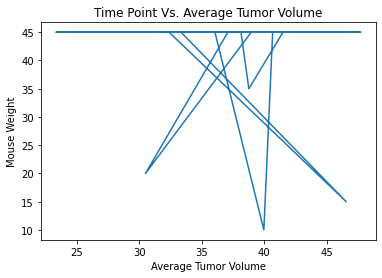

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_tumor_volume = combined_timepoint_df.loc[combined_timepoint_df["Drug Regimen"] == treatment_list[0], "Tumor Volume (mm3)"]
cap_mouse_weight = combined_timepoint_df.loc[combined_timepoint_df["Drug Regimen"] == treatment_list[0], "Timepoint"]
x_values = cap_tumor_volume
y_values = cap_mouse_weight
plt.plot(x_values,y_values)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.title('Time Point Vs. Average Tumor Volume')
plt.show()

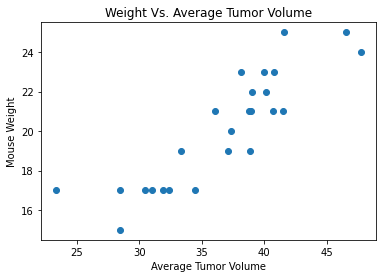

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_tumor_volume = combined_timepoint_df.loc[combined_timepoint_df["Drug Regimen"] == treatment_list[0], "Tumor Volume (mm3)"]
cap_mouse_weight = combined_timepoint_df.loc[combined_timepoint_df["Drug Regimen"] == treatment_list[0], "Weight (g)"]
x_values = cap_tumor_volume
y_values = cap_mouse_weight
plt.scatter(x_values,y_values)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.title('Weight Vs. Average Tumor Volume')

plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight_corr = combined_timepoint_df.loc[combined_timepoint_df["Drug Regimen"] == treatment_list[0], "Tumor Volume (mm3)"]
avg_tumor_volume_corr = combined_timepoint_df.loc[combined_timepoint_df["Drug Regimen"] == treatment_list[0], "Weight (g)"]
correlation = st.pearsonr(mouse_weight_corr,avg_tumor_volume_corr)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.88


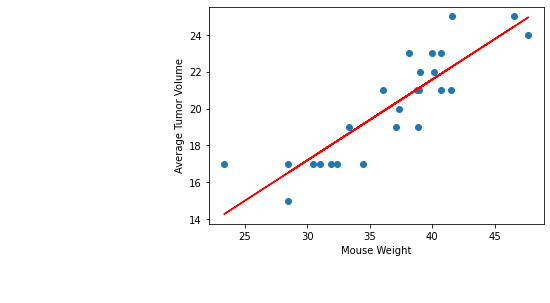

In [29]:
x_values = mouse_weight_corr
y_values = avg_tumor_volume_corr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

In [ ]:
#Observations:
#1. The first observation that I noticed was that most mice use Capomulin and the average tumor size was smaller using 
    #Capomulin versus other drugs.
#2. The second observation I saw was Infubinol had an outlier for low tumor volume while the average was one of the highest
    #of the four drugs looked at. I would think that the mouse with the low tumor volume had an outside factor contributing 
    # to that low tumor volume or it was an extraordinary case
#3. Lastly, the correlation between the tumor volume and mouse weight based on the drug Capomulin is high, so this means 
    #that there is a typically, the more the mouse weighs, the more tumor volume the mouse will have when they are taking
    #this drug.